# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda II

Vamos continuar trabalhando com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

sm.__version__

'0.12.2'

In [3]:
df = pd.read_csv('previsao_de_renda.csv')
print("\nDADOS AUSENTES")
print(df.isnull().sum())
df.dropna(subset=['tempo_emprego'],inplace=True)
df.drop_duplicates()
df.reset_index(drop=True, inplace=True)
print("\n")
df.drop(['Unnamed: 0','data_ref','id_cliente'],axis = 1,inplace=True)
print("\nAPÓS TRATAMENTO DE DADOS DUPLICADOS E AUSENTES")
df.info()



DADOS AUSENTES
Unnamed: 0                  0
data_ref                    0
id_cliente                  0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64



APÓS TRATAMENTO DE DADOS DUPLICADOS E AUSENTES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12427 entries, 0 to 12426
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   12427 non-null  object 
 1   posse_de_veiculo       12427 non-null  bool   
 2   posse_de_imovel        12427 non-null  bool   
 3   qtd_filhos             12427 non-null  int64  
 4   tipo_renda             12427 non-null  object

1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).
2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?
3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?
4. Rode um modelo *stepwise*. Avalie o $R^2$ na base de testes. Qual o melhor resultado?
5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?
6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.
7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.


### 1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).

In [4]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)
train, test = train_test_split(df, test_size=0.25, random_state=2360873)
print("Base Treino")
print(train.shape)
print("\nBase Teste")
print(test.shape)
test.head(2)

Base Treino
(9320, 12)

Base Teste
(3107, 12)


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
10241,F,False,True,0,Assalariado,Secundário,Separado,Casa,50,4.202740,1.0,2451.86
238,F,False,True,3,Empresário,Superior incompleto,Casado,Casa,33,6.046575,5.0,7725.87


### 2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?

L1_wt : If 0, the fit is a ridge fit, if 1 it is a lasso fit.

In [5]:
#modelo = 'renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + C(tipo_renda,Treatment(1)) + C(educacao,Treatment(4)) + C(estado_civil,Treatment(2)) + C(tipo_residencia,Treatment(4)) + idade + tempo_emprego + qt_pessoas_residencia'
modelo = 'renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia'
md = smf.ols(modelo, data = test)
reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0 # 0 = ridge :: 1 = lasso
                         , alpha = 0.001)

reg.summary()

NotImplementedError: 

### 3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?

In [ ]:
modelo = 'renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia'
md = smf.ols(modelo, data = test)
reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0)

print(reg.summary())

In [ ]:
LR = reg.summary().tables[1]
results_as_html = LR.as_html()
lr=pd.read_html(results_as_html, header=0, index_col=0)[0]
lr[(lr['P>|t|']<0.05)]

### 4. Rode um modelo *stepwise*. Avalie o $R^2$ na base de testes. Qual o melhor resultado?

In [ ]:
test.head()

In [ ]:
X = test.copy()
X.sexo = X.sexo.map({'F': 1, 'M':0})
X.drop(['renda'],axis = 1,inplace=True)
X = pd.get_dummies(X, columns=['sexo','posse_de_veiculo','posse_de_imovel','tipo_renda','educacao','estado_civil','tipo_residencia'], drop_first=True)
print(X.shape)
y=np.array(test['renda'].index.values)
print(y.shape)
y

In [ ]:
#y, X = patsy.dmatrices('renda ~ C(sexo) + posse_de_veiculo + posse_de_imovel + qtd_filhos + C(tipo_renda) + C(educacao) + C(estado_civil) + C(tipo_residencia) + idade + tempo_emprego + qt_pessoas_residencia', data = test)

In [ ]:

from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.07, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype=np.dtype('float64'))
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.index[new_pval.argmin()]
            included.append(best_feature)
            changed=True
            if verbose:
                 print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        print("-"*60)
        print(included)
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

variaveis = stepwise_selection(X, y)

print('\nresulting features:')
print(variaveis)

### 5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?

### 6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.

### 7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

In [5]:
#arv = df.copy()
arv = test.copy()
reg = smf.ols('renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia', data = arv).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     49.72
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          2.34e-198
Time:                        17:11:44   Log-Likelihood:                -31787.
No. Observations:                3107   AIC:                         6.362e+04
Df Residuals:                    3082   BIC:                         6.377e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         3396.7086   5067.135      0.670      0.503   -6538.596    1.33e+04
sexo[T.M]                         5547.1595    275.358     20.145      0.000    5007.255    6087.064
posse_de_veiculo[T.True]           162.5177    264.782      0.614      0.539    -356.650     681.685
posse_de_imovel[T.True]            423.7963    262.189      1.616      0.106     -90.287     937.879
tipo_renda[T.Bolsista]            -864.0956   3031.806     -0.285      0.776   -6808.661    5080.470
tipo_renda[T.Empresário]           922.5801    277.599      3.323      0.001     378.282    1466.878
tipo_renda[T.Pensionista]        -3968.9622   4784.624     -0.830      0.407   -1.34e+04    5412.413
tipo_renda[T.Servidor público]     336.9727    419.811      0.803      0.422    -486.165    1160.111
educacao[T.Pós graduação]          405.1512   3625.105      0.112      0.911   -6702.715    7513.017
educacao[T.Secundário]            -511.2466   1315.687     -0.389      0.698   -3090.960    2068.466
educacao[T.Superior completo]      491.4851   1322.156      0.372      0.710   -2100.911    3083.881
educacao[T.Superior incompleto]   -385.1544   1432.433     -0.269      0.788   -3193.774    2423.465
estado_civil[T.Separado]         -2575.6470   2448.823     -1.052      0.293   -7377.137    2225.843
estado_civil[T.Solteiro]         -2706.4645   2394.696     -1.130      0.258   -7401.827    1988.898
estado_civil[T.União]             -744.8814    468.770     -1.589      0.112   -1664.014     174.251
estado_civil[T.Viúvo]            -2213.3336   2502.346     -0.885      0.376   -7119.768    2693.100
tipo_residencia[T.Casa]           -478.7797   1000.482     -0.479      0.632   -2440.459    1482.900
tipo_residencia[T.Com os pais]    -746.6954   1118.674     -0.667      0.505   -2940.118    1446.728
tipo_residencia[T.Comunitário]    -114.5267   2592.280     -0.044      0.965   -5197.298    4968.244
tipo_residencia[T.Estúdio]       -1026.1484   1783.541     -0.575      0.565   -4523.198    2470.901
tipo_residencia[T.Governamental]  -854.5242   1200.333     -0.712      0.477   -3208.059    1499.010
qtd_filhos                        2846.5474   2401.251      1.185      0.236   -1861.668    7554.762
idade                               37.1195     14.931      2.486      0.013       7.843      66.396
tempo_emprego                      518.9151     19.406     26.740      0.000     480.865     556.965
qt_pessoas_residencia            -2529.1212   2393.809     -1.057      0.291   -7222.745    2164.502
==============================================================================
Omnibus:                     3283.798   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           340418.675
Skew:             

### Identificando as variáveis mais significantes

In [6]:
LR = reg.summary().tables[1]
results_as_html = LR.as_html()
lr=pd.read_html(results_as_html, header=0, index_col=0)[0]
lr[(lr['P>|t|']<0.05)]

,coef,std err,t,P>|t|,[0.025,0.975]
sexo[T.M],5547.1595,275.358,20.145,0.000,5007.255,6087.064
tipo_renda[T.Empresário],922.5801,277.599,3.323,0.001,378.282,1466.878
idade,37.1195,14.931,2.486,0.013,7.843,66.396
tempo_emprego,518.9151,19.406,26.740,0.000,480.865,556.965


In [ ]:
arv.columns

In [7]:
X = arv[['sexo','tipo_renda','idade', 'tempo_emprego']].copy()
#X = arv[['sexo','idade', 'tempo_emprego']].copy()
X.sexo = X.sexo.map({'F': 1, 'M':0})
X.head(5)

,sexo,tipo_renda,idade,tempo_emprego
10241,1,Assalariado,50,4.202740
238,1,Empresário,33,6.046575
6601,0,Empresário,57,7.457534
812,1,Empresário,30,5.657534
5010,1,Assalariado,31,4.597260


In [8]:
X['tipo_renda'].unique()

array(['Assalariado', 'Empresário', 'Servidor público', 'Pensionista',
       'Bolsista'], dtype=object)

In [9]:
X.tipo_renda = X.tipo_renda.map({'Empresário':1, 
                                 'Assalariado':0,
                                 'Servidor público':0,
                                 'Bolsista':0,
                                 'Pensionista':0},na_action=None)
X.rename(columns={'tipo_renda': 'empresario'}, inplace = True)
X.head(5)

,sexo,empresario,idade,tempo_emprego
10241,1,0,50,4.202740
238,1,1,33,6.046575
6601,0,1,57,7.457534
812,1,1,30,5.657534
5010,1,0,31,4.597260


In [10]:
X = pd.get_dummies(X, columns=['sexo','empresario'], drop_first=True)
X.head(5)

,idade,tempo_emprego,sexo_1,empresario_1
10241,50,4.202740,1,0
238,33,6.046575,1,1
6601,57,7.457534,0,1
812,30,5.657534,1,1
5010,31,4.597260,1,0


In [11]:
y=np.array(arv['renda'].index.values)
print(y.shape)
print(X.shape)

(3107,)
(3107, 4)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2360873)

In [13]:
regr_1 = DecisionTreeRegressor(max_depth = 4, min_samples_leaf = 5)
regr_1.fit(X_train, y_train)
mse1 = regr_1.score(X_test, y_test)
print(np.power(mse1,2))
print(mse1**2)

0.001902397541412388
0.001902397541412388


n_minimo,2,3,4,5,6,7,8,9
profundidade,,,,,,,,
2,-0.015736,-0.015736,-0.015736,-0.015736,-0.015736,-0.015736,-0.015736,-0.015736
3,-0.032172,-0.029553,-0.029553,-0.029553,-0.029553,-0.029553,-0.028707,-0.027730
4,-0.040020,-0.040515,-0.040515,-0.043616,-0.044994,-0.047411,-0.046566,-0.044873
5,-0.063663,-0.073840,-0.073010,-0.070597,-0.078891,-0.077084,-0.081137,-0.079793
6,-0.091742,-0.082798,-0.082680,-0.081473,-0.089031,-0.089263,-0.091782,-0.090439
7,-0.100415,-0.102357,-0.113130,-0.116667,-0.110095,-0.111263,-0.125854,-0.123696
8,-0.165192,-0.159425,-0.162149,-0.150754,-0.152273,-0.153291,-0.146099,-0.146780
9,-0.208212,-0.203606,-0.210058,-0.185214,-0.182531,-0.172647,-0.172257,-0.170365


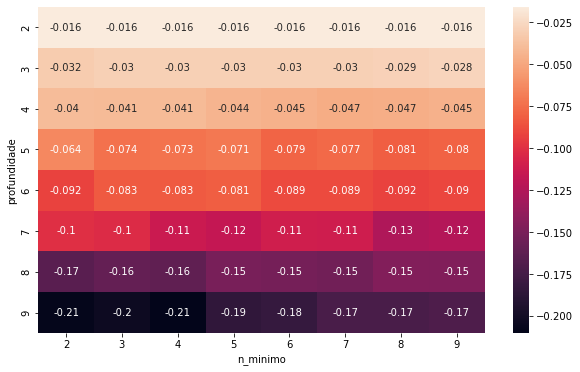

In [14]:
mses = []
ind_i = []
ind_j = []
plt.rc('figure', figsize=(10,6))
for i in range(2, 10):
    for j in range(2, 10):
        regr_1 = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        regr_1.fit(X_train, y_train)
        mse1 = regr_1.score(X_test, y_test)
        mses.append(mse1)
        ind_i.append(i)
        ind_j.append(j)
        
df_mse = pd.DataFrame({'mses':mses, 'profundidade':ind_i, 'n_minimo':ind_j})
sns.heatmap(df_mse.pivot(index='profundidade', columns='n_minimo', values='mses'),annot=True)
df_mse.pivot(index='profundidade', columns='n_minimo', values='mses')


In [16]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=9,min_samples_leaf=2)
regr_2 = DecisionTreeRegressor(max_depth=4,min_samples_leaf=4)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

mse1 = regr_1.score(X_train, y_train)
mse2 = regr_2.score(X_train, y_train)

template = "O R² da árvore com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))
print('\nQuanto mais próximo de 0 o R², MENOS o modelo explica o fenômeno.')
print('Quanto mais próximo de 1 o R²,  MAIS o modelo explica o fenômeno.')

O R² da árvore com profundidade=9 é: 0,13
O R² da árvore com profundidade=4 é: 0,03

Quanto mais próximo de 0 o R², MENOS o modelo explica o fenômeno.
Quanto mais próximo de 1 o R²,  MAIS o modelo explica o fenômeno.


In [ ]:


plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(regr_1, 
                    feature_names=X.columns,  
                    filled=True) 

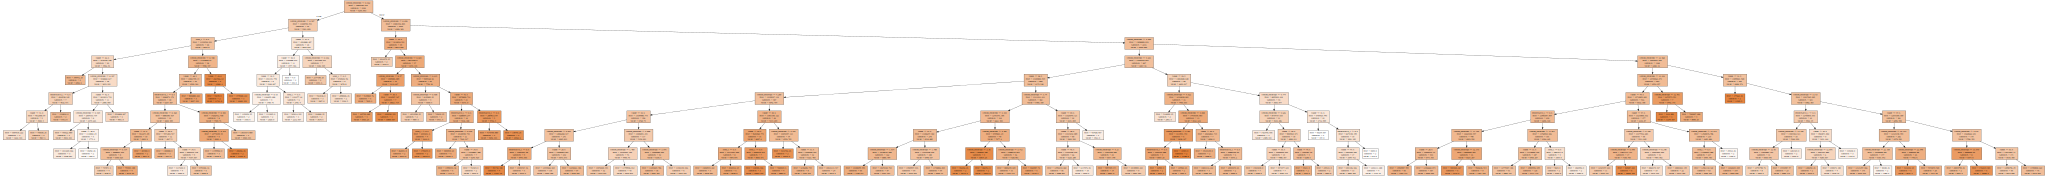

In [17]:
import graphviz
# DOT data

dot_data = tree.export_graphviz(regr_1, out_file=None, 
                                feature_names=X.columns,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [18]:
path = regr_2.cost_complexity_pruning_path(X_train, y_train)
pd.DataFrame.from_dict(path)

,ccp_alphas,impurities
0,0.000000,1.267300e+07
1,1035.487988,1.267403e+07
2,5269.974599,1.267930e+07
3,5984.605338,1.268529e+07
4,6724.342104,1.269201e+07
5,8926.254293,1.270094e+07
6,8951.980358,1.270989e+07
7,37217.175137,1.274711e+07
8,37353.015690,1.278446e+07
9,39815.938134,1.286409e+07


Text(0, 0.5, 'Impureza total das folhas')

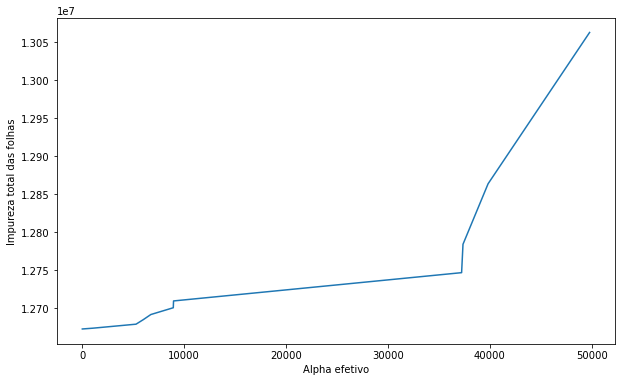

In [19]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

In [ ]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=2360873, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [ ]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

In [ ]:

train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
arvore_final = DecisionTreeRegressor(random_state=0, ccp_alpha=5000)
arvore_final.fit(X_train,y_train)
print(f"Profundidade: {arvore_final.tree_.max_depth}")
print(f"R² na base de teste: {arvore_final.score(X_test,y_test):.2f}")
print(f"MSE na base de teste: {mean_squared_error(y_test, arvore_final.predict(X_test)):.2f}")                              

In [ ]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

In [ ]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)